## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits
from sklearn import datasets, decomposition, manifold, preprocessing
import umap

## Определение алгоритмов

In [2]:
UMAP = lambda dim: umap.UMAP(n_components=dim)
TSNE = lambda dim: manifold.TSNE(n_components=dim)
SVD  = lambda dim: decomposition.TruncatedSVD(n_components=dim)
PCA  = lambda dim: decomposition.PCA(n_components=dim)

algorithms = {
   'UMAP': UMAP,
   'TSNE': TSNE,
   'SVD': SVD,
   'PCA': PCA
}

## Определение датасетов

In [3]:
datasets = {
    'mnist':     (554,   fetch_openml),
    'fmnist':    (40996, fetch_openml),
    'shuttle':   (40685, fetch_openml),
    'pendigits': (None,  load_digits)
}

## Функция снижения размерности датасета выбранным алгоритмом

In [4]:
def reduce_dataset_dim(data_id, data_source, desired_dim, algorithm_name):
    if data_id is None:
        dataset, labels = data_source(return_X_y = True, as_frame = False)
    else:
        dataset, labels = data_source(data_id = data_id, return_X_y = True, as_frame = False)

    algorithm = algorithms[algorithm_name](desired_dim)
    resulting_dataset = algorithm.fit_transform(dataset)
    color = labels.astype(int)

    return resulting_dataset, color

## Функция вывода графиков для датасета, обработанного алгоритмами

In [8]:
DIM = 2

def make_dataset_plots(dataset_name):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f"dataset: {dataset_name}", fontsize=16)

    (data_id, data_source) = datasets[dataset_name]
    for idx, algorithm_name in enumerate(algorithms.keys()):
        resulting_dataset, color = reduce_dataset_dim(data_id, data_source, DIM, algorithm_name)
        axes[idx].scatter(resulting_dataset[:,0], resulting_dataset[:,1], c=color)
        axes[idx].set_xlabel(algorithm_name)

## Вывод результатов

D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


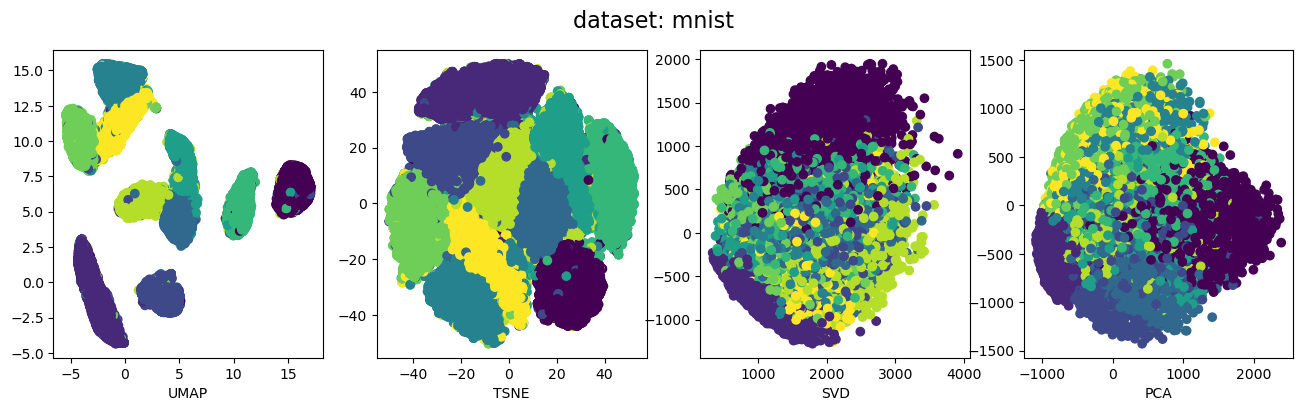

In [9]:
make_dataset_plots('mnist')

D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


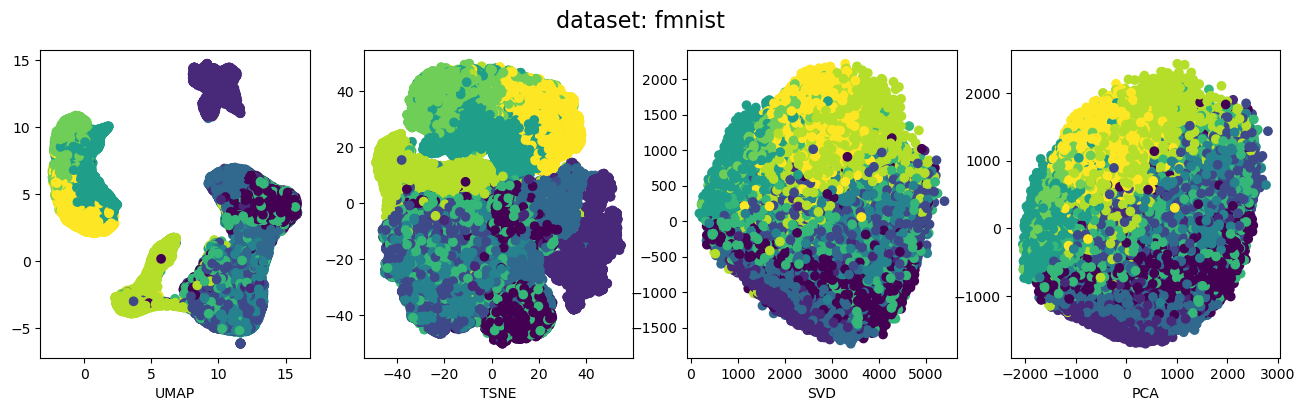

In [10]:
make_dataset_plots('fmnist')

D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


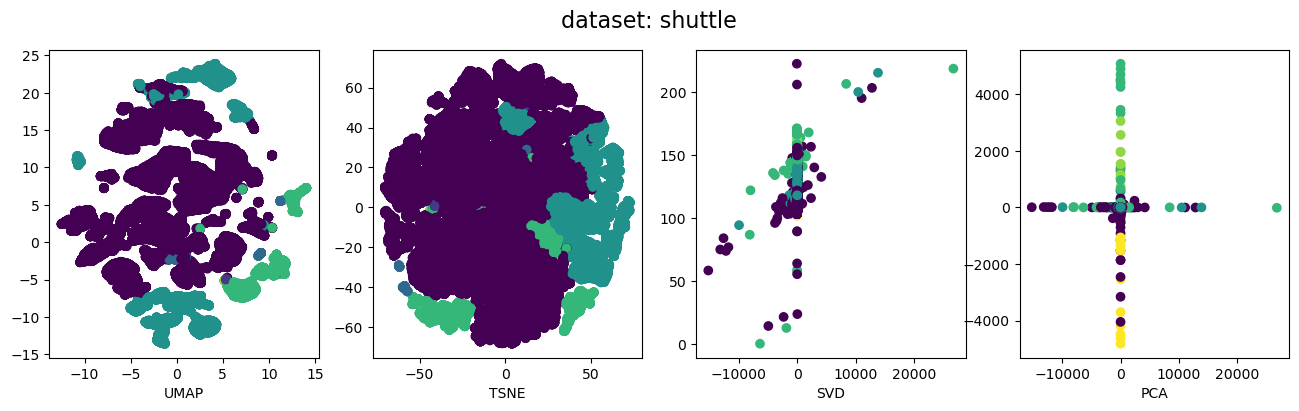

In [11]:
make_dataset_plots('shuttle')

D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Anacondas\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


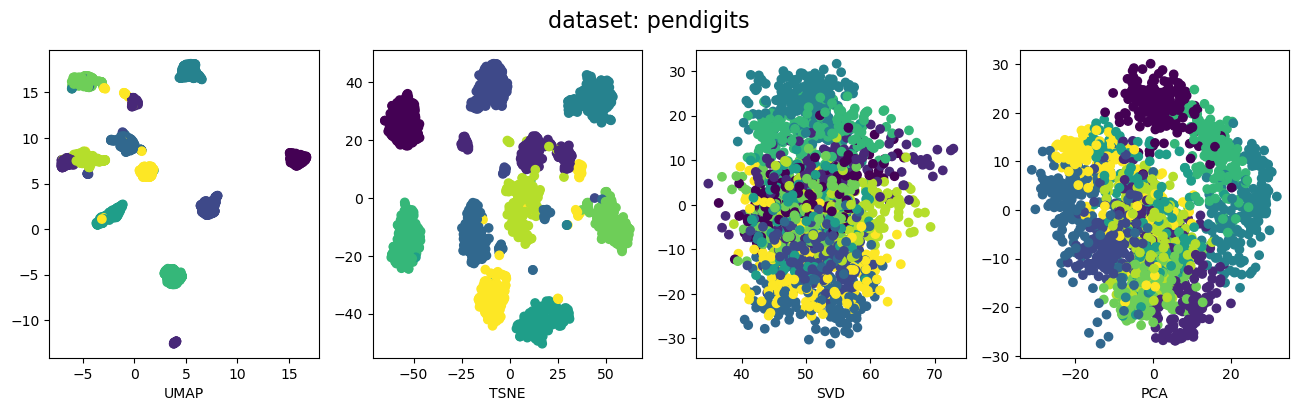

In [12]:
make_dataset_plots('pendigits')